Antes de empezar con los algoritmos de Clustering, combinaremos el data set preprocesado con el data set de datos sintéticos para obtener el data set aumentado y posteriormente hacer las comparaciones.

In [40]:
import pandas as pd

# Cargar datasets
df_real = pd.read_csv("dataset_sin_escalar.csv")
df_sintetico = pd.read_csv("dataset_sintetico_final2.csv")

# Convertir la columna 'date' a datetime
df_real['date'] = pd.to_datetime(df_real['date'])

# Obtener la última fecha de la base real
ultima_fecha = df_real['date'].max()

# Generar fechas consecutivas para el dataset sintético
fechas_sinteticas = pd.date_range(start=ultima_fecha + pd.Timedelta(days=1), periods=len(df_sintetico), freq='D')
df_sintetico['date'] = fechas_sinteticas

# Unir ambos datasets
df_combinado = pd.concat([df_real, df_sintetico], ignore_index=True)

# Ordenar por fecha
df_combinado = df_combinado.sort_values(by='date').reset_index(drop=True)

# Guardar como nuevo CSV si se desea
df_combinado.to_csv("dataset_combinado.csv", index=False)


In [41]:
df_sintetico

,steps_total,steps_evening,activity_count,sleep_prev_sleep_start,sleep_prev_sleep_end,sleep_prev_sleep_minutes_total,sleep_prev_sleep_minutes_light,sleep_prev_sleep_minutes_deep,sleep_prev_sleep_wakeups,sleep_next_sleep_start,sleep_next_sleep_end,sleep_next_sleep_minutes_total,sleep_next_sleep_minutes_light,sleep_next_sleep_minutes_deep,sleep_next_sleep_wakeups,date
0,1022,299,1,1375.0,327.0,387.0,254.0,139.000000,3,1331.0,260,369.000000,239.0,132.0,1,2024-10-18
1,4690,365,1,2.0,458.0,403.0,278.0,116.000000,2,1.0,453,394.000000,247.0,153.0,0,2024-10-19
2,1231,352,1,1397.0,483.0,483.0,277.0,204.983333,3,2.0,305,185.000000,122.0,38.0,1,2024-10-20
3,5505,321,1,1303.0,380.5,390.0,236.0,151.000000,1,1336.0,275,360.000000,220.0,139.0,1,2024-10-21
4,5708,1614,1,1386.0,394.0,423.0,223.0,198.000000,2,1405.0,453,488.000000,305.0,166.0,4,2024-10-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,10502,1971,2,1303.0,380.5,390.0,236.0,151.000000,1,1186.0,183,453.000000,324.0,111.0,1,2027-11-13
1122,1440,326,1,1303.0,380.5,390.0,236.0,151.000000,1,1213.0,231,540.000000,232.0,247.0,1,2027-11-14
1123,14199,238,2,1303.0,380.5,390.0,236.0,151.000000,1,1341.0,306,386.000000,248.0,138.0,1,2027-11-15
1124,11177,973,2,48.0,253.0,263.0,141.0,89.000000,0,1236.0,314,452.000000,264.0,198.0,3,2027-11-16


In [42]:
df_combinado

,date,steps_total,steps_evening,activity_count,sleep_prev_sleep_start,sleep_prev_sleep_end,sleep_prev_sleep_minutes_total,sleep_prev_sleep_minutes_light,sleep_prev_sleep_minutes_deep,sleep_prev_sleep_wakeups,sleep_next_sleep_start,sleep_next_sleep_end,sleep_next_sleep_minutes_total,sleep_next_sleep_minutes_light,sleep_next_sleep_minutes_deep,sleep_next_sleep_wakeups
0,2018-04-26,0.0,973.0,1.0,1303.0,380.5,390.0,236.0,151.0,1.0,1330.0,227.0,327.000000,182.0,145.0,1.0
1,2018-04-27,15305.0,698.0,1.0,1330.0,227.0,327.0,182.0,145.0,1.0,1427.0,425.0,399.000000,295.0,104.0,2.0
2,2018-04-28,12492.0,1100.0,3.0,1427.0,425.0,399.0,295.0,104.0,2.0,1400.0,438.0,453.000000,329.0,124.0,1.0
3,2018-04-29,9163.0,200.0,2.0,1400.0,438.0,453.0,329.0,124.0,1.0,75.0,454.0,353.000000,229.0,124.0,2.0
4,2018-05-02,13412.0,1751.0,2.0,118.0,472.0,332.0,193.0,139.0,2.0,1403.0,184.0,212.000000,115.0,97.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,2027-11-13,10502.0,1971.0,2.0,1303.0,380.5,390.0,236.0,151.0,1.0,1186.0,183.0,453.000000,324.0,111.0,1.0
2248,2027-11-14,1440.0,326.0,1.0,1303.0,380.5,390.0,236.0,151.0,1.0,1213.0,231.0,540.000000,232.0,247.0,1.0
2249,2027-11-15,14199.0,238.0,2.0,1303.0,380.5,390.0,236.0,151.0,1.0,1341.0,306.0,386.000000,248.0,138.0,1.0
2250,2027-11-16,11177.0,973.0,2.0,48.0,253.0,263.0,141.0,89.0,0.0,1236.0,314.0,452.000000,264.0,198.0,3.0


In [43]:
df_real.shape

(1126, 16)

In [44]:
df_combinado.shape

(2252, 16)

Vemos que el data set ha aumentado el doble, lo que equivale a más o menos 3 años más de datos.

In [45]:
cols_escalar = [
    'steps_total',
    'steps_evening',
    'activity_count',
    'sleep_prev_sleep_start',
    'sleep_prev_sleep_end',
    'sleep_prev_sleep_minutes_total',
    'sleep_prev_sleep_minutes_light',
    'sleep_prev_sleep_minutes_deep',
    'sleep_prev_sleep_wakeups',
    'sleep_next_sleep_start',
    'sleep_next_sleep_end',
    'sleep_next_sleep_minutes_total',
    'sleep_next_sleep_minutes_light',
    'sleep_next_sleep_minutes_deep',
    'sleep_next_sleep_wakeups'
]

from sklearn.preprocessing import StandardScaler

# Inicializar el escalador
scaler = StandardScaler()

# Ajustar y transformar
df_combinado[cols_escalar] = scaler.fit_transform(df_combinado[cols_escalar])
df_real[cols_escalar] = scaler.fit_transform(df_real[cols_escalar])

In [46]:
df_combinado

,date,steps_total,steps_evening,activity_count,sleep_prev_sleep_start,sleep_prev_sleep_end,sleep_prev_sleep_minutes_total,sleep_prev_sleep_minutes_light,sleep_prev_sleep_minutes_deep,sleep_prev_sleep_wakeups,sleep_next_sleep_start,sleep_next_sleep_end,sleep_next_sleep_minutes_total,sleep_next_sleep_minutes_light,sleep_next_sleep_minutes_deep,sleep_next_sleep_wakeups
0,2018-04-26,-1.662125,-0.259846,-0.741708,0.541237,-0.007160,0.019723,-0.015559,0.003592,-0.146662,0.590106,-1.486234,-0.929365,-1.016608,-0.259484,-0.165699
1,2018-04-27,1.855271,-0.547842,-0.741708,0.590353,-1.519517,-0.872259,-1.020428,-0.163695,-0.146662,0.766579,0.503874,0.126588,1.134419,-1.436410,0.978945
2,2018-04-28,1.208787,-0.126844,2.520649,0.766806,0.431276,0.147149,1.082354,-1.306823,1.004153,0.717458,0.634537,0.918553,1.781631,-0.862300,-0.165699
3,2018-04-29,0.443716,-1.069378,0.889470,0.717690,0.559359,0.911704,1.715049,-0.749200,-0.146662,-1.693130,0.795354,-0.548049,-0.121933,-0.862300,0.978945
4,2018-05-02,1.420222,0.554922,0.889470,-1.614399,0.894343,-0.801467,-0.815732,-0.330982,1.004153,0.722915,-1.918429,-2.615958,-2.291995,-1.637348,-1.310343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2247,2027-11-13,0.751445,0.785319,0.889470,0.541237,-0.007160,0.019723,-0.015559,0.003592,-0.146662,0.328125,-1.928481,0.918553,1.686453,-1.235471,-0.165699
2248,2027-11-14,-1.331184,-0.937423,-0.741708,0.541237,-0.007160,0.019723,-0.015559,0.003592,-0.146662,0.377246,-1.446030,2.194497,-0.064826,2.668477,-0.165699
2249,2027-11-15,1.601090,-1.029582,0.889470,0.541237,-0.007160,0.019723,-0.015559,0.003592,-0.146662,0.610118,-0.692201,-0.064070,0.239744,-0.460423,-0.165699
2250,2027-11-16,0.906574,-0.259846,0.889470,-1.741737,-1.263353,-1.778399,-1.783384,-1.725040,-1.297478,0.419090,-0.611793,0.903887,0.544314,1.261908,2.123589


In [47]:
df_real

,date,steps_total,steps_evening,activity_count,sleep_prev_sleep_start,sleep_prev_sleep_end,sleep_prev_sleep_minutes_total,sleep_prev_sleep_minutes_light,sleep_prev_sleep_minutes_deep,sleep_prev_sleep_wakeups,sleep_next_sleep_start,sleep_next_sleep_end,sleep_next_sleep_minutes_total,sleep_next_sleep_minutes_light,sleep_next_sleep_minutes_deep,sleep_next_sleep_wakeups
0,2018-04-26,-1.679307,-0.263205,-0.729070,0.550282,-0.011317,0.037830,-0.009350,0.025137,-0.144910,0.582497,-1.513380,-0.919399,-1.019401,-0.239750,-0.151832
1,2018-04-27,1.845340,-0.551513,-0.729070,0.598925,-1.505644,-0.864832,-1.019033,-0.141025,-0.144910,0.759556,0.498648,0.134969,1.139854,-1.421761,0.995567
2,2018-04-28,1.197523,-0.130059,2.528600,0.773679,0.421891,0.166782,1.093823,-1.276466,0.996131,0.710272,0.630751,0.925745,1.789541,-0.845170,-0.151832
3,2018-04-29,0.430875,-1.073611,0.899765,0.725036,0.548447,0.940493,1.729550,-0.722592,-0.144910,-1.708311,0.793339,-0.538655,-0.121304,-0.845170,0.995567
4,2018-05-02,1.409394,0.552444,0.899765,-1.584592,0.879438,-0.793192,-0.813357,-0.307187,0.996131,0.715748,-1.950336,-2.603458,-2.299668,-1.623568,-1.299230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1121,2024-10-08,-1.361732,-1.041111,-0.729070,0.658377,-0.522406,0.138126,0.196327,-0.002557,-1.285952,0.708446,0.346222,0.471781,0.738576,-0.153261,0.995567
1122,2024-10-14,0.090501,-0.534738,0.899765,0.670988,-0.113535,0.023502,-0.102839,0.218992,3.278215,0.527737,0.000722,0.032461,-0.006653,-0.009114,-0.151832
1123,2024-10-15,0.333691,-0.594497,0.899765,0.550282,-0.011317,0.037830,-0.009350,0.025137,-0.144910,0.527737,0.000722,0.032461,-0.006653,-0.009114,-0.151832
1124,2024-10-16,0.331619,0.514701,-0.729070,0.550282,-0.011317,0.037830,-0.009350,0.025137,-0.144910,0.527737,0.000722,0.032461,-0.006653,-0.009114,-0.151832


1. K-Means

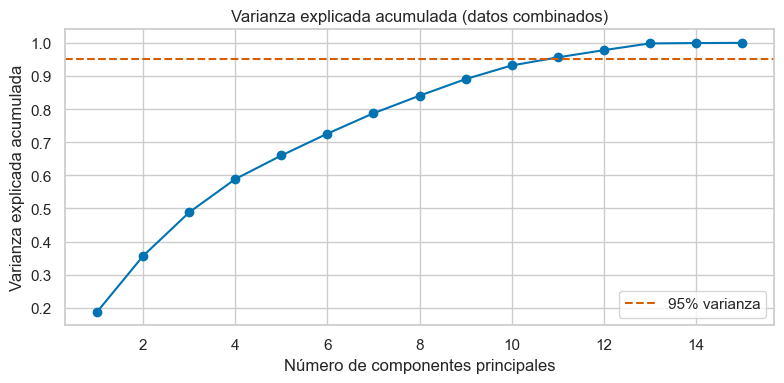

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# PCA sobre el dataset combinado
pca_temp = PCA()
pca_temp.fit(df_combinado[cols_escalar])

# Porcentaje de varianza explicada acumulada
explained_var = np.cumsum(pca_temp.explained_variance_ratio_)

# Plot
plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_var) + 1), explained_var, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.title('Varianza explicada acumulada (datos combinados)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


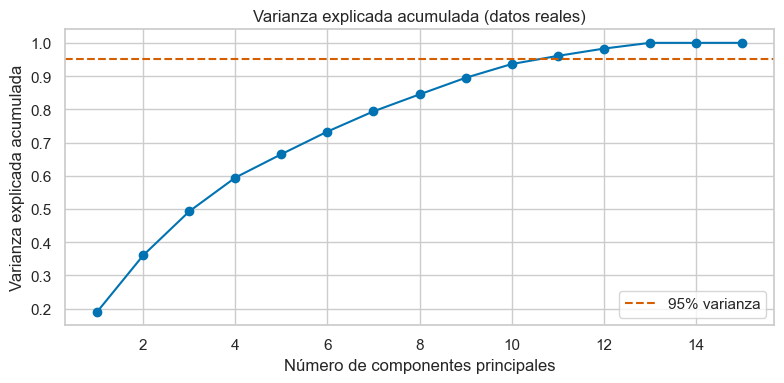

In [50]:
# PCA sobre el dataset real
pca_real = PCA()
pca_real.fit(df_real[cols_escalar])

explained_var_real = np.cumsum(pca_real.explained_variance_ratio_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, len(explained_var_real) + 1), explained_var_real, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% varianza')
plt.title('Varianza explicada acumulada (datos reales)')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [51]:
import pandas as pd
from sklearn.decomposition import PCA

# PCA para datos reales
pca_real = PCA(n_components=11)
X_pca_real = pca_real.fit_transform(df_real[cols_escalar])

df_real_pca = pd.concat([
    df_real.reset_index(drop=True),
    pd.DataFrame(X_pca_real, columns=[f'PC{i+1}' for i in range(11)])
], axis=1)

# PCA para datos combinados
pca_comb = PCA(n_components=11)
X_pca_comb = pca_comb.fit_transform(df_combinado[cols_escalar])

df_comb_pca = pd.concat([
    df_combinado.reset_index(drop=True),
    pd.DataFrame(X_pca_comb, columns=[f'PC{i+1}' for i in range(11)])
], axis=1)

# (Opcional) Guardar los nuevos CSVs
df_real_pca.to_csv("pca_real.csv", index=False)
df_comb_pca.to_csv("pca_combinado.csv", index=False)


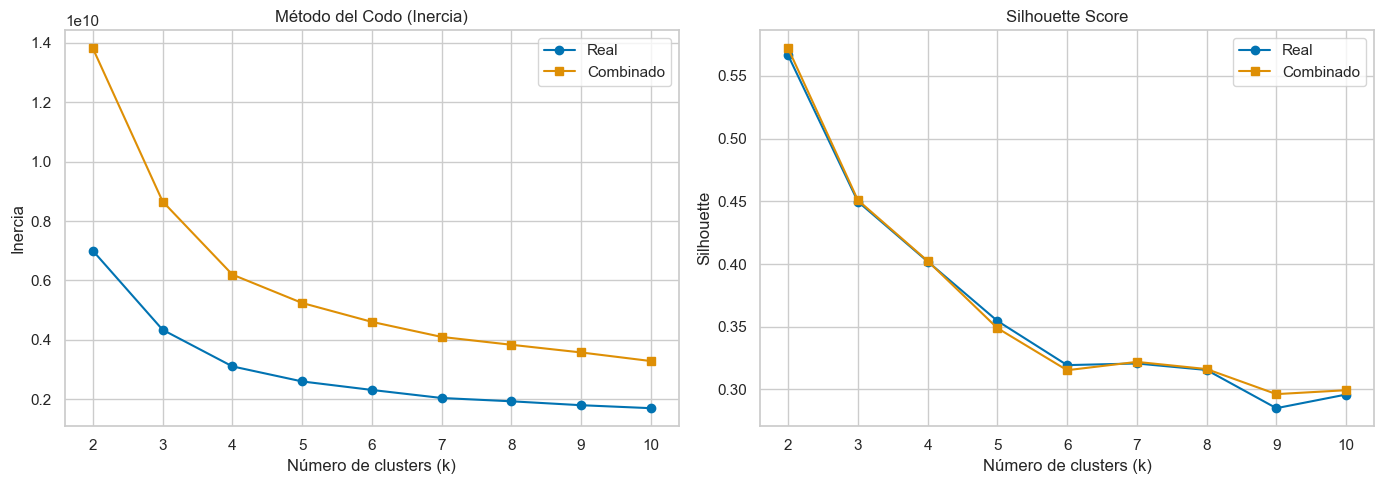

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Cargar datos escalados
df_real = pd.read_csv("dataset_sin_escalar.csv")
df_comb = pd.read_csv("dataset_combinado.csv")

cols_escalar = [
    'steps_total', 'steps_evening', 'activity_count',
    'sleep_prev_sleep_start', 'sleep_prev_sleep_end',
    'sleep_prev_sleep_minutes_total', 'sleep_prev_sleep_minutes_light',
    'sleep_prev_sleep_minutes_deep', 'sleep_prev_sleep_wakeups',
    'sleep_next_sleep_start', 'sleep_next_sleep_end',
    'sleep_next_sleep_minutes_total', 'sleep_next_sleep_minutes_light',
    'sleep_next_sleep_minutes_deep', 'sleep_next_sleep_wakeups'
]

# Aplicar PCA
pca = PCA(n_components=11)
X_real_pca = pca.fit_transform(df_real[cols_escalar])
X_comb_pca = pca.fit_transform(df_comb[cols_escalar])

# Evaluar valores de k
k_values = range(2, 11)
inertia_real = []
silhouette_real = []
inertia_comb = []
silhouette_comb = []

for k in k_values:
    # Real
    kmeans_real = KMeans(n_clusters=k, random_state=42)
    labels_real = kmeans_real.fit_predict(X_real_pca)
    inertia_real.append(kmeans_real.inertia_)
    silhouette_real.append(silhouette_score(X_real_pca, labels_real))
    
    # Combinado
    kmeans_comb = KMeans(n_clusters=k, random_state=42)
    labels_comb = kmeans_comb.fit_predict(X_comb_pca)
    inertia_comb.append(kmeans_comb.inertia_)
    silhouette_comb.append(silhouette_score(X_comb_pca, labels_comb))

# Graficar
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Elbow (inercia)
ax[0].plot(k_values, inertia_real, marker='o', label='Real')
ax[0].plot(k_values, inertia_comb, marker='s', label='Combinado')
ax[0].set_title('Método del Codo (Inercia)')
ax[0].set_xlabel('Número de clusters (k)')
ax[0].set_ylabel('Inercia')
ax[0].legend()

# Silhouette
ax[1].plot(k_values, silhouette_real, marker='o', label='Real')
ax[1].plot(k_values, silhouette_comb, marker='s', label='Combinado')
ax[1].set_title('Silhouette Score')
ax[1].set_xlabel('Número de clusters (k)')
ax[1].set_ylabel('Silhouette')
ax[1].legend()

plt.tight_layout()
plt.show()


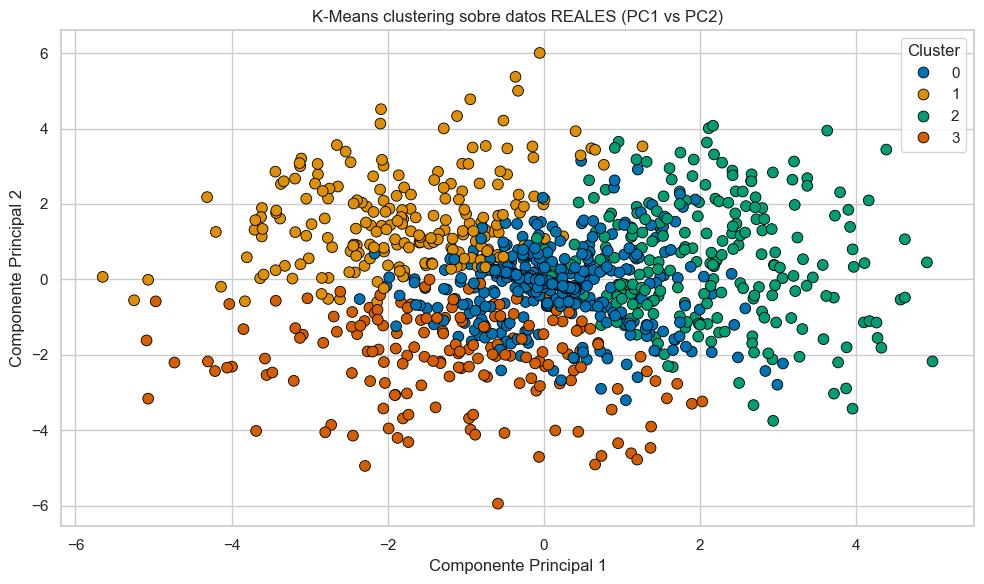

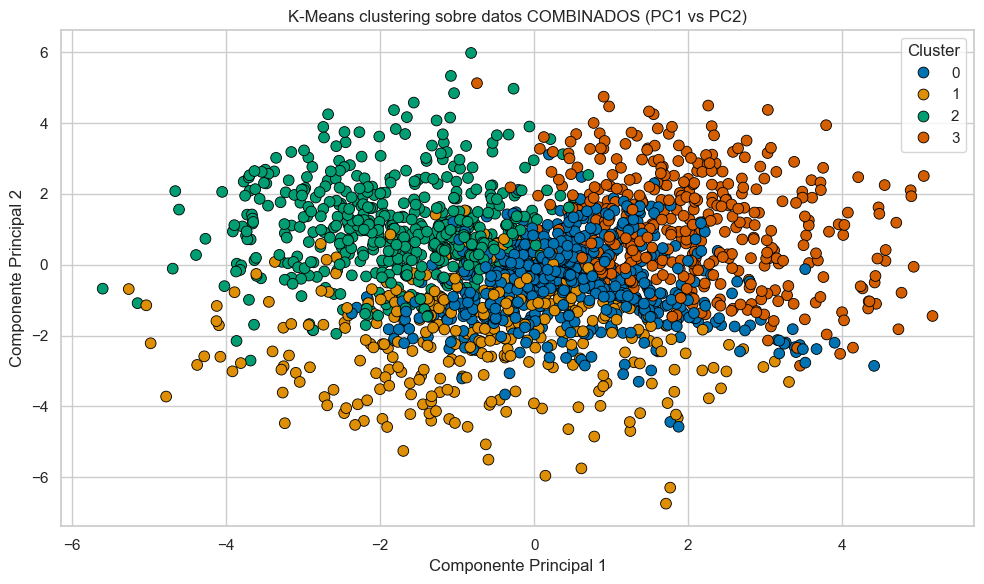

In [53]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Aplicar K-Means ---
k = 4

# Datos reales
kmeans_real = KMeans(n_clusters=k, random_state=42)
labels_real = kmeans_real.fit_predict(df_real_pca[[f'PC{i+1}' for i in range(11)]])
df_real_pca['cluster'] = labels_real
df_real_pca.to_csv("real_kmeans_clusters.csv", index=False)

# Datos combinados
kmeans_comb = KMeans(n_clusters=k, random_state=42)
labels_comb = kmeans_comb.fit_predict(df_comb_pca[[f'PC{i+1}' for i in range(11)]])
df_comb_pca['cluster'] = labels_comb
df_comb_pca.to_csv("combinado_kmeans_clusters.csv", index=False)

# --- Visualización con colores accesibles ---
sns.set(style="whitegrid", palette="colorblind")

# Gráfico para datos reales
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_real_pca,
    x="PC1", y="PC2",
    hue="cluster",
    palette="colorblind",
    edgecolor="black",
    s=60
)
plt.title("K-Means clustering sobre datos REALES (PC1 vs PC2)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()

# Gráfico para datos combinados
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_comb_pca,
    x="PC1", y="PC2",
    hue="cluster",
    palette="colorblind",
    edgecolor="black",
    s=60
)
plt.title("K-Means clustering sobre datos COMBINADOS (PC1 vs PC2)")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()





2. DBSCAN

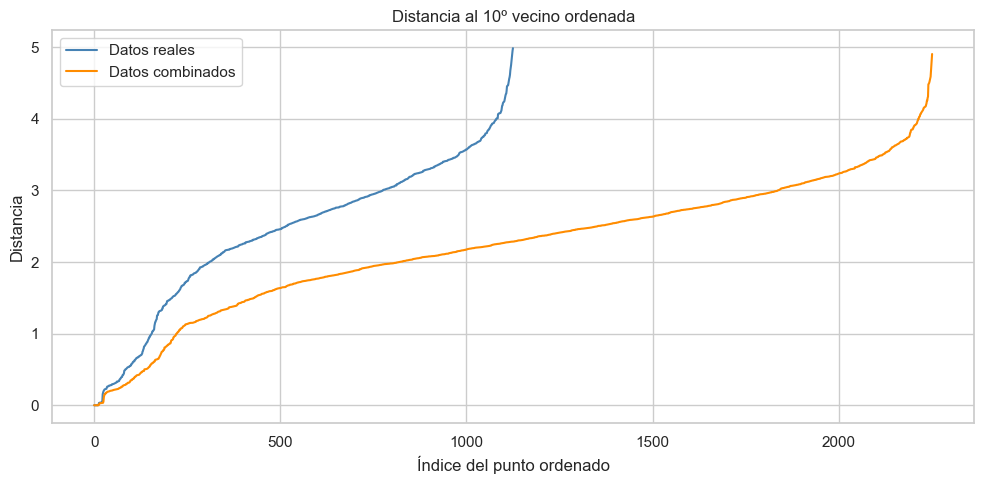

In [55]:
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- Parámetros ---
min_samples = 10

# --- Cargar los datasets con PCA ---
df_real_pca = pd.read_csv("pca_real.csv")
df_comb_pca = pd.read_csv("pca_combinado.csv")

# --- Obtener matrices de componentes principales ---
X_real = df_real_pca[[f'PC{i+1}' for i in range(11)]].values
X_comb = df_comb_pca[[f'PC{i+1}' for i in range(11)]].values

# --- Calcular distancias para datos REALES ---
neighbors_real = NearestNeighbors(n_neighbors=min_samples)
neighbors_real_fit = neighbors_real.fit(X_real)
distances_real, _ = neighbors_real_fit.kneighbors(X_real)
k_distances_real = np.sort(distances_real[:, -1])

# --- Calcular distancias para datos COMBINADOS ---
neighbors_comb = NearestNeighbors(n_neighbors=min_samples)
neighbors_comb_fit = neighbors_comb.fit(X_comb)
distances_comb, _ = neighbors_comb_fit.kneighbors(X_comb)
k_distances_comb = np.sort(distances_comb[:, -1])

# --- Graficar ambos ---
plt.figure(figsize=(10, 5))
plt.plot(k_distances_real, label='Datos reales', color='steelblue')
plt.plot(k_distances_comb, label='Datos combinados', color='darkorange')
plt.title(f'Distancia al {min_samples}º vecino ordenada')
plt.xlabel('Índice del punto ordenado')
plt.ylabel('Distancia')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


[Reales]
Clusters detectados: 1
Outliers detectados: 29
Silhouette Score (sin outliers): nan

[Combinados]
Clusters detectados: 1
Outliers detectados: 2
Silhouette Score (sin outliers): nan



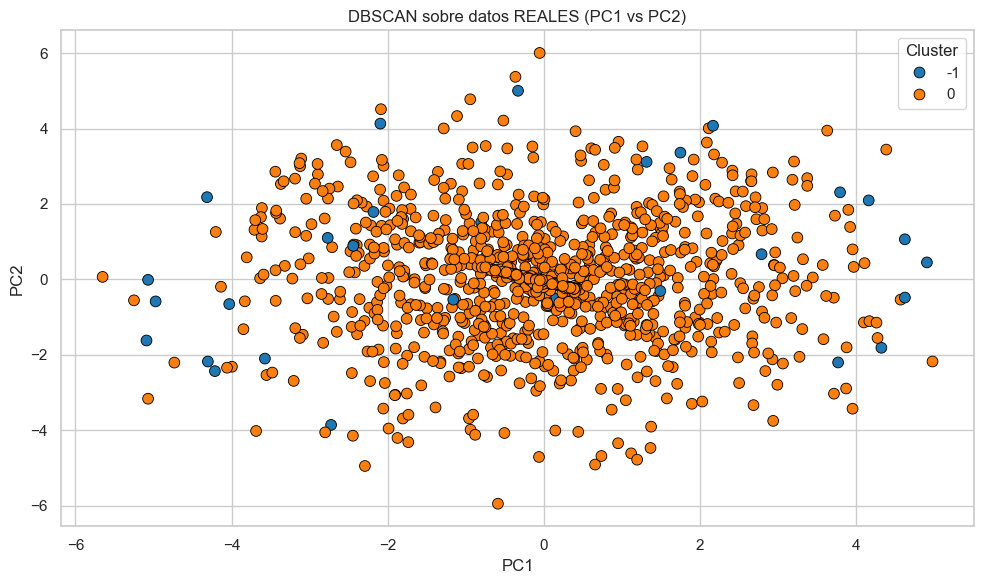

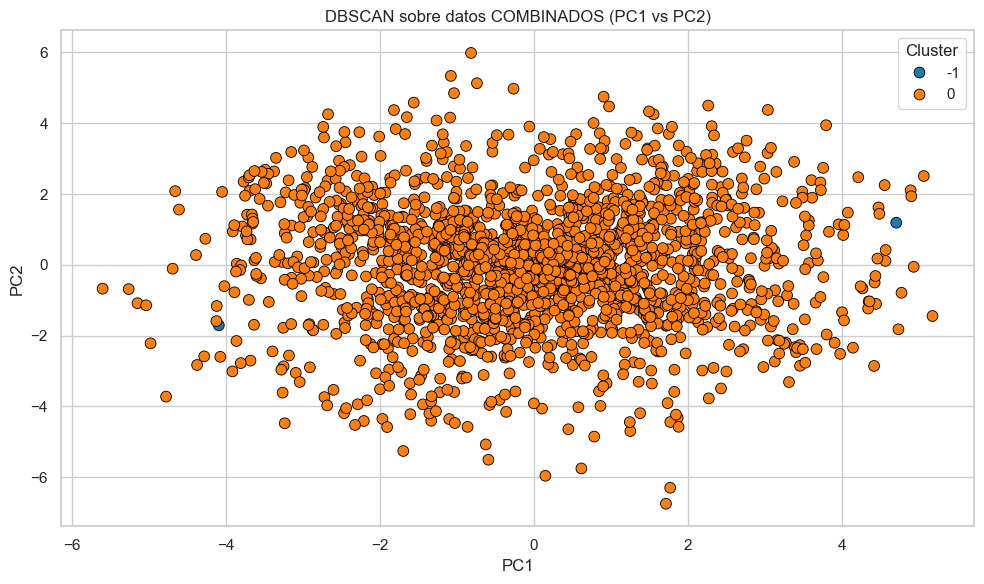

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# --- Cargar datos PCA ---
df_real_pca = pd.read_csv("pca_real.csv")
df_comb_pca = pd.read_csv("pca_combinado.csv")

# --- Extraer matrices ---
cols_pca = [f'PC{i+1}' for i in range(11)]
X_real = df_real_pca[cols_pca].values
X_comb = df_comb_pca[cols_pca].values

# --- Aplicar DBSCAN con valores ajustados ---
dbscan_real = DBSCAN(eps=3.5, min_samples=10)
labels_real = dbscan_real.fit_predict(X_real)
df_real_pca['cluster'] = labels_real

dbscan_comb = DBSCAN(eps=4.0, min_samples=10)
labels_comb = dbscan_comb.fit_predict(X_comb)
df_comb_pca['cluster'] = labels_comb

# --- Función para calcular Silhouette ignorando outliers ---
def safe_silhouette(X, labels):
    mask = labels != -1
    if len(set(labels[mask])) > 1:
        return silhouette_score(X[mask], labels[mask])
    else:
        return np.nan

# --- Evaluaciones ---
def resumen_dbscan(labels, nombre):
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_outliers = sum(labels == -1)
    silhouette = safe_silhouette(X_real if nombre == "Reales" else X_comb, labels)
    print(f"[{nombre}]")
    print(f"Clusters detectados: {n_clusters}")
    print(f"Outliers detectados: {n_outliers}")
    print(f"Silhouette Score (sin outliers): {silhouette:.3f}\n")

resumen_dbscan(labels_real, "Reales")
resumen_dbscan(labels_comb, "Combinados")

# --- Visualización ---
sns.set(style="whitegrid", palette="colorblind")

def plot_dbscan(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x=X[:, 0], y=X[:, 1],
        hue=labels,
        palette="tab10",
        s=60, edgecolor="black"
    )
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

plot_dbscan(X_real, labels_real, "DBSCAN sobre datos REALES (PC1 vs PC2)")
plot_dbscan(X_comb, labels_comb, "DBSCAN sobre datos COMBINADOS (PC1 vs PC2)")

# --- Guardar resultados ---
df_real_pca.to_csv("real_dbscan_clusters.csv", index=False)
df_comb_pca.to_csv("combinado_dbscan_clusters.csv", index=False)


3. Clustering Jerárquico Aglomerativo

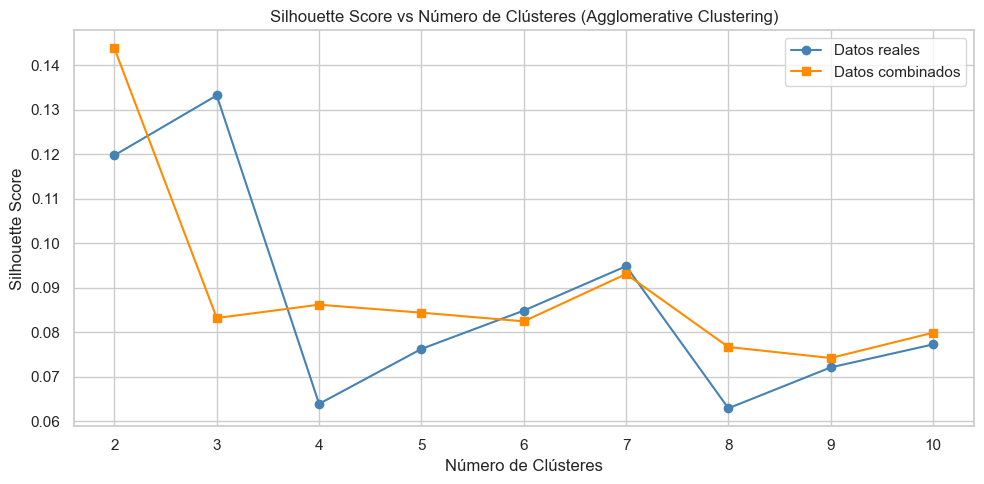

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# --- Cargar datos ---
df_real_pca = pd.read_csv("pca_real.csv")
df_comb_pca = pd.read_csv("pca_combinado.csv")

# --- Extraer componentes principales ---
cols_pca = [f'PC{i+1}' for i in range(11)]
X_real = df_real_pca[cols_pca].values
X_comb = df_comb_pca[cols_pca].values

# --- Función para calcular silhouette para distintos k ---
def calcular_silhouette_scores(X, k_range):
    scores = []
    for k in k_range:
        model = AgglomerativeClustering(n_clusters=k)
        labels = model.fit_predict(X)
        score = silhouette_score(X, labels)
        scores.append(score)
    return scores

# --- Rango de valores de k ---
k_values = range(2, 11)

# --- Calcular silhouette para ambos conjuntos ---
silhouette_real = calcular_silhouette_scores(X_real, k_values)
silhouette_comb = calcular_silhouette_scores(X_comb, k_values)

# --- Graficar ---
plt.figure(figsize=(10, 5))
plt.plot(k_values, silhouette_real, marker='o', label='Datos reales', color='steelblue')
plt.plot(k_values, silhouette_comb, marker='s', label='Datos combinados', color='darkorange')
plt.title("Silhouette Score vs Número de Clústeres (Agglomerative Clustering)")
plt.xlabel("Número de Clústeres")
plt.ylabel("Silhouette Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



Agglomerative - Silhouette (Reales, k=3): 0.133
Agglomerative - Silhouette (Combinados, k=2): 0.144


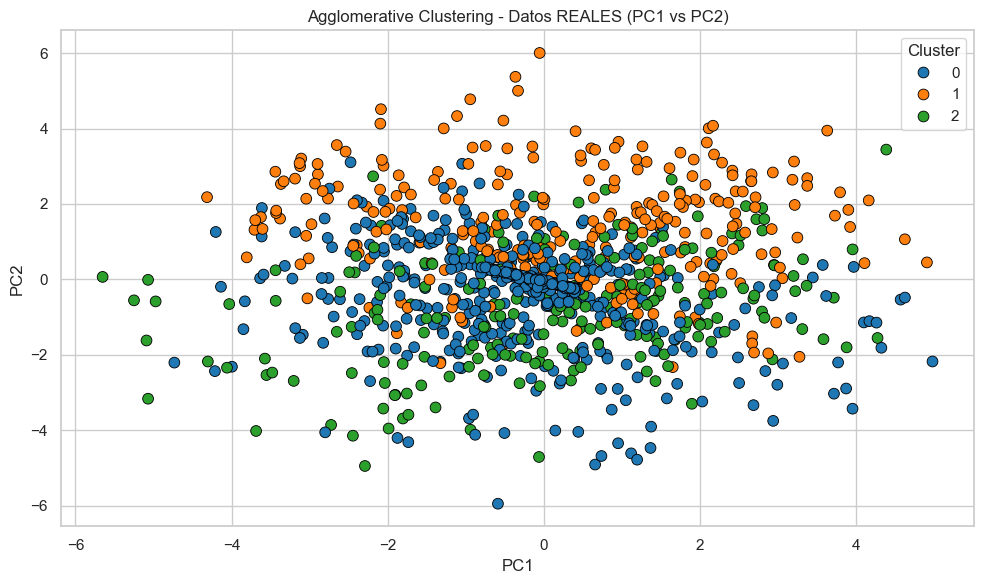

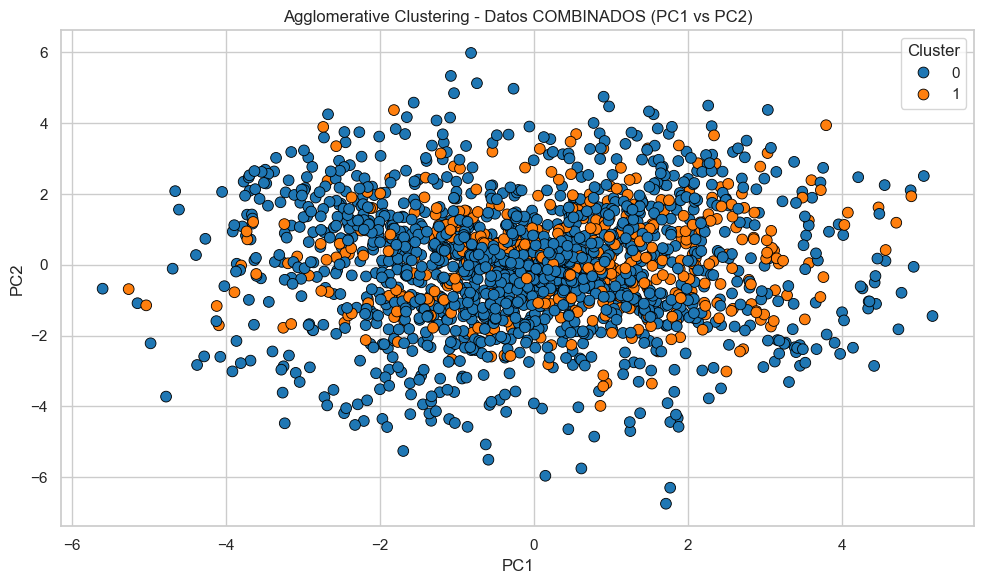

In [63]:

import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Cargar datos PCA ---
df_real_pca = pd.read_csv("pca_real.csv")
df_comb_pca = pd.read_csv("pca_combinado.csv")

# --- Extraer componentes principales ---
cols_pca = [f'PC{i+1}' for i in range(11)]
X_real = df_real_pca[cols_pca].values
X_comb = df_comb_pca[cols_pca].values

# --- Aplicar Agglomerative Clustering con k óptimos ---
model_real = AgglomerativeClustering(n_clusters=3)
labels_real = model_real.fit_predict(X_real)
df_real_pca['cluster'] = labels_real

model_comb = AgglomerativeClustering(n_clusters=2)
labels_comb = model_comb.fit_predict(X_comb)
df_comb_pca['cluster'] = labels_comb

# --- Calcular Silhouette Score ---
sil_real = silhouette_score(X_real, labels_real)
sil_comb = silhouette_score(X_comb, labels_comb)

print(f"Agglomerative - Silhouette (Reales, k=3): {sil_real:.3f}")
print(f"Agglomerative - Silhouette (Combinados, k=2): {sil_comb:.3f}")

# --- Visualización PC1 vs PC2 ---
sns.set(style="whitegrid", palette="colorblind")

def plot_clusters(X, labels, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette="tab10", s=60, edgecolor="black")
    plt.title(title)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title="Cluster")
    plt.tight_layout()
    plt.show()

plot_clusters(X_real, labels_real, "Agglomerative Clustering - Datos REALES (PC1 vs PC2)")
plot_clusters(X_comb, labels_comb, "Agglomerative Clustering - Datos COMBINADOS (PC1 vs PC2)")

# --- Guardar resultados ---
df_real_pca.to_csv("real_agglomerative_clusters.csv", index=False)
df_comb_pca.to_csv("combinado_agglomerative_clusters.csv", index=False)
